<div class="markdown" style="background-color: white; color:black;" >
    <div class="markdown" style="background-color: white; color:black; text-align: center;">
        <h1 style="font-size: 48px; font-weight: bold;">Stochiastic Gradient Descent As A Method For MutiLabel Classification
    </h1>
    </div>
</div>


<style>
    .markdown-cell {
        background-color: black;
        color: white;
        padding: 20px;
        font-family: Arial, sans-serif;
        font-size: 24px; /* Increase the font size here */
        line-height: 1.5;
    }
    
    .markdown-cell h1 {
        font-size: 24px;
        font-weight: bold;
        margin-bottom: 20px;
    }
    
    .markdown-cell h2 {
        font-size: 20px;
        font-weight: bold;
        margin-bottom: 15px;
    }
    
    .markdown-cell p {
        margin-bottom: 10px;
    }
</style>

<div class="markdown-cell">
    <h2 style="font-size: 28px;">Abstract</h2>
</div>


We employed <span style="color:blue"><b>SGD Classifier</b></span> to predict what annotations can be assigned to a particular post. Achieving this was very intuitive and fairly simple, as one would notice if they went through this notebook's contents thoroughly.

We used the <a href="https://drive.google.com/file/d/1EaJRkoVUiBQVaWlOC3ooYjdIR1catdYd/view" style="color:red">Primate Dataset</a>, which was offered to use in the Problem Statement document.


<style>
    .markdown-cell {
        background-color: black;
        color: white;
        padding: 20px;
        font-family: Arial, sans-serif;
        font-size: 16px;
        line-height: 1.5;
    }
    
    .markdown-cell h1 {
        font-size: 24px;
        font-weight: bold;
        margin-bottom: 20px;
    }
    
    .markdown-cell h2 {
        font-size: 20px;
        font-weight: bold;
        margin-bottom: 15px;
    }
    
    .markdown-cell p {
        margin-bottom: 10px;
    }
</style>

<div class="markdown-cell">
    <h1 style="font-size: 24px;">Import Data, Libraries</h1>
</div>


In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_colwidth', 50)

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
import spacy

In [24]:
df = pd.read_json('primate_dataset.json')
df.head()

,post_title,post_text,annotations
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",[[Feeling-bad-about-yourself-or-that-you-are-a...
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,[[Feeling-bad-about-yourself-or-that-you-are-a...
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,[[Feeling-bad-about-yourself-or-that-you-are-a...
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",[[Feeling-bad-about-yourself-or-that-you-are-a...
4,I've been feeling this way for some tine,I'm alway feeling like this. It doesn't even m...,[[Feeling-bad-about-yourself-or-that-you-are-a...


In [25]:
df.head(1)

,post_title,post_text,annotations
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",[[Feeling-bad-about-yourself-or-that-you-are-a...


The following function performs these steps:
1. <span style= "color:skyblue">Regular Expression-Based Cleaning</span>:
    
    - Removes <span style= "color:red">stock market tickers ($GE)</span>.
    - Removes <span style= "color:red">old-style retweet text ("RT")</span>.
    - Removes <span style= "color:red">hyperlinks</span>.
    - Removes <span style= "color:red">hashtags</span> by replacing the <span style= "color:red">"#"</span> symbol.
2. <span style= "color:skyblue">Tokenization</span>:
    - Converts the text into a list of individual words using <span style= "color:red">TweetTokenizer</span>.
3. <span style= "color:skyblue">Stopword Removal and Punctuation Removal</span>:
    - Filters out <span style= "color:red">common stop words (e.g., "the", "a")</span> in English using `stopwords_english`.
    - Removes any remaining <span style= "color:red">punctuation characters (e.g., ".", ",", ";")</span>.
4. <span style= "color:skyblue">Stemming (Optional)</span>:
    - The commented-out line (`processed_text.append(word)`) would simply <span style= "color:red">add words without stemming</span>.
    - The active line performs stemming (`stemmer.stem(word)`) to <span style= "color:red">reduce words to their base form (e.g., "jumping" becomes "jump")</span>.
5. <span style= "color:skyblue">Return Processed Text</span>:
    - Returns the resulting list of processed words.

In [26]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
def process_text(text):
    """Process text function.
    Input:
        text: a string containing the text
    Output:
        processed_text: a list of words containing the processed text

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks    
    text = re.sub(r'https?://[^\s\n\r]+', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    # tokenize text
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    text_tokens = tokenizer.tokenize(text)

    processed_text = []
    for word in text_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # processed_text.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            processed_text.append(stem_word)

    return processed_text

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2003 entries, 0 to 2002
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_title      2003 non-null   object
 1   post_text       2003 non-null   object
 2   annotations     2003 non-null   object
 3   processed_text  2003 non-null   object
dtypes: object(4)
memory usage: 78.2+ KB


The following cell extracts the unique annotations from the posts, then forms a column in the dataset for the same

In [28]:
df['tags'] = df['annotations'].apply(lambda x: [annotation[0] for annotation in x if annotation[1] == 'yes'])


We then proceed the apply a MultiLabelBinarizer, to convert yes to 1 and no to 0.

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['tags'])
y.shape

(2003, 9)

In [30]:
mlb.classes_

array(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
       'Feeling-down-depressed-or-hopeless',
       'Feeling-tired-or-having-little-energy',
       'Little-interest-or-pleasure-in-doing ',
       'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
       'Poor-appetite-or-overeating',
       'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
       'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
       'Trouble-falling-or-staying-asleep-or-sleeping-too-much'],
      dtype=object)

In [31]:
pd.DataFrame(y, columns=mlb.classes_).head()

,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television,Trouble-falling-or-staying-asleep-or-sleeping-too-much
0,1,0,1,1,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0
2,1,1,1,1,0,0,1,0,0
3,1,1,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0


Instead of having the same names, we label the tags from 1 to 9. This serves as a gread visual aid.

In [32]:
new_data = pd.DataFrame(y, columns=mlb.classes_)
df = pd.concat([df, new_data], axis=1)
# Rename columns as tag1-tag9
new_columns = ['Tag' + str(i+1) for i in range(9)]
renaming_dict = dict(zip(df.columns[5:], new_columns))
df.rename(columns=renaming_dict, inplace=True)

# Print the renaming dictionary
print(renaming_dict)


{'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down': 'Tag1', 'Feeling-down-depressed-or-hopeless': 'Tag2', 'Feeling-tired-or-having-little-energy': 'Tag3', 'Little-interest-or-pleasure-in-doing ': 'Tag4', 'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual': 'Tag5', 'Poor-appetite-or-overeating': 'Tag6', 'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way': 'Tag7', 'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television': 'Tag8', 'Trouble-falling-or-staying-asleep-or-sleeping-too-much': 'Tag9'}


In [33]:
df.head()

,post_title,post_text,annotations,processed_text,tags,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,Tag9
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",[[Feeling-bad-about-yourself-or-that-you-are-a...,high school years back one highest competitors...,[Feeling-bad-about-yourself-or-that-you-are-a-...,1,0,1,1,0,0,0,0,0
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,[[Feeling-bad-about-yourself-or-that-you-are-a...,nine years ago diagnosed depression generalise...,[Feeling-bad-about-yourself-or-that-you-are-a-...,1,1,0,0,1,0,0,0,0
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,[[Feeling-bad-about-yourself-or-that-you-are-a...,background information gf almost years broke h...,[Feeling-bad-about-yourself-or-that-you-are-a-...,1,1,1,1,0,0,1,0,0
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",[[Feeling-bad-about-yourself-or-that-you-are-a...,girlfriend months best friend months always ta...,[Feeling-bad-about-yourself-or-that-you-are-a-...,1,1,0,0,0,0,1,0,0
4,I've been feeling this way for some tine,I'm alway feeling like this. It doesn't even m...,[[Feeling-bad-about-yourself-or-that-you-are-a...,alway feeling like even matter age anymore fee...,[Feeling-bad-about-yourself-or-that-you-are-a-...,1,1,0,0,0,0,0,0,0


For any string related task, we always employ the `TfidfVectorizer` to vectorize and return a csr matrix of the strings. This converts the string to float which allows for computation.
  

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', max_features= 100000, ngram_range=(1,5), stop_words='english')
X = tfidf.fit_transform(df['processed_text'])

In [35]:
X

<2003x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 283016 stored elements in Compressed Sparse Row format>

In [36]:
tfidf.vocabulary_

{'high': 10877,
 'school': 87219,
 'years': 99740,
 'highest': 10910,
 'joined': 12235,
 'band': 1700,
 'freshman': 8321,
 'year': 99619,
 'senior': 92553,
 'best': 1964,
 'section': 91126,
 'academics': 137,
 'straight': 94084,
 'daily': 4270,
 'enlisted': 6317,
 'military': 19533,
 'believe': 1915,
 'worst': 99447,
 'decisions': 4720,
 'life': 13311,
 'went': 98878,
 'boot': 2368,
 'camp': 2750,
 'motivated': 19986,
 'believed': 1941,
 'applied': 1103,
 'scholarships': 87202,
 'offered': 20708,
 'turned': 97350,
 'signed': 92904,
 'papers': 21063,
 'thought': 96020,
 'set': 92617,
 'success': 94396,
 'dead': 4593,
 'wrong': 99539,
 'joining': 12236,
 'benefit': 1955,
 'far': 6992,
 'half': 9927,
 'service': 92610,
 'trying': 97241,
 'financially': 8043,
 'hopefully': 11146,
 'attend': 1363,
 'college': 3339,
 'sounds': 93439,
 'like': 13633,
 'plan': 27020,
 'feel': 7098,
 'happiness': 10062,
 'convinced': 3861,
 'anymore': 927,
 'job': 12108,
 'exercise': 6572,
 'progressing': 41861

Upon further exploration, we noticed a severe class imbalance. 

<Axes: >

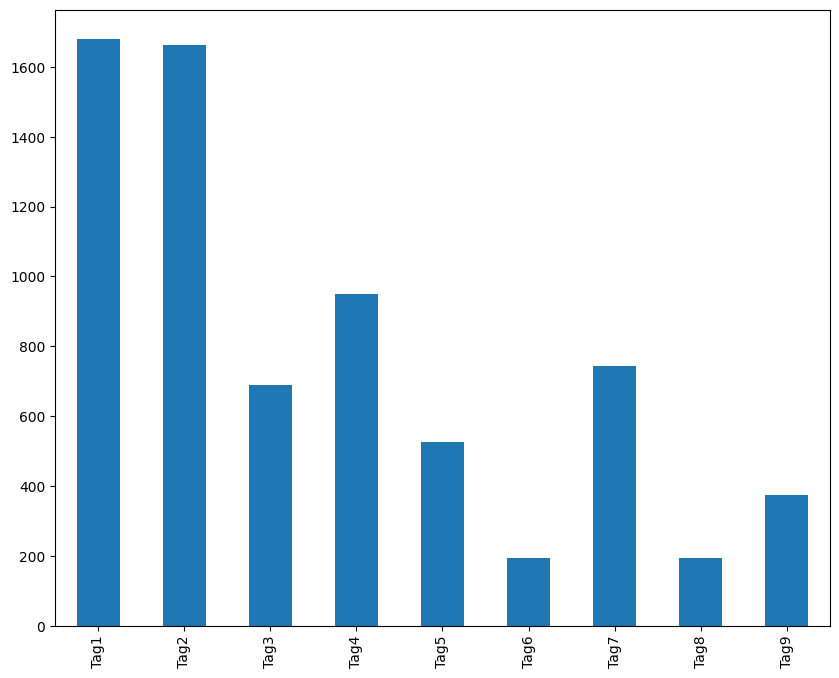

In [38]:
comments_labels = df[['Tag1','Tag2','Tag3','Tag4','Tag5', 'Tag6', 'Tag7', 'Tag8', 'Tag9']]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
comments_labels.sum(axis=0).plot.bar()

In [37]:
X.shape, y.shape

((2003, 100000), (2003, 9))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

To deal with the class imbalance, we assigned weights to negate bias for the oversampled classes.

In [42]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced',y_train )
sample_weights

array([0.1346546 , 0.05130655, 1.0993689 , ..., 0.12784369, 4.12504426,
       0.11510482])

In [43]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((401, 100000), (401, 9), (1602, 100000), (1602, 9))

We imported multiple classification models to test for varied accuracies.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()

Jaccard score serves as a great evaluation metric for multilabel classification.

In [49]:
def j_score(y_true, y_pred):
    jaccard = np.minimum(y_true, y_pred).sum(axis=1) / np.maximum(y_true, y_pred).sum(axis=1)
    return jaccard.mean()
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(j_score(y_test, y_pred)))
    print("----")

The accuracy here is very low because this accuracy accounts for only when the predicted array of tags matches exactly with the actual array. The accuracy for actual classes is actually decent(as seen in later cells).

In [52]:
for clsf in [sgd,lr,svc]:
    clf = OneVsRestClassifier(clsf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # print_score(y_pred, clsf)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    

Accuracy: 0.11970074812967581
Accuracy: 0.08728179551122195
Accuracy: 0.11471321695760599


In [53]:
x = X_test[12]

In [54]:
# xt = tfidf.transform(x)

In [55]:
clf.predict(x)

array([[1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [56]:
y_test[12]

array([1, 1, 1, 1, 0, 0, 1, 0, 0])

In [57]:
mlb.inverse_transform(clf.predict(x))

[('Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
  'Feeling-down-depressed-or-hopeless')]

In [58]:
from sklearn.metrics import hamming_loss
hamming_loss_value = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming_loss_value)


Hamming Loss: 0.21058464948739264


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       338
           1       0.82      1.00      0.90       329
           2       0.65      0.22      0.33       148
           3       0.58      0.47      0.52       190
           4       0.83      0.22      0.34        88
           5       1.00      0.07      0.13        42
           6       0.84      0.45      0.58       154
           7       0.00      0.00      0.00        47
           8       0.90      0.12      0.20        78

   micro avg       0.79      0.63      0.70      1414
   macro avg       0.72      0.39      0.44      1414
weighted avg       0.76      0.63      0.63      1414
 samples avg       0.79      0.67      0.69      1414



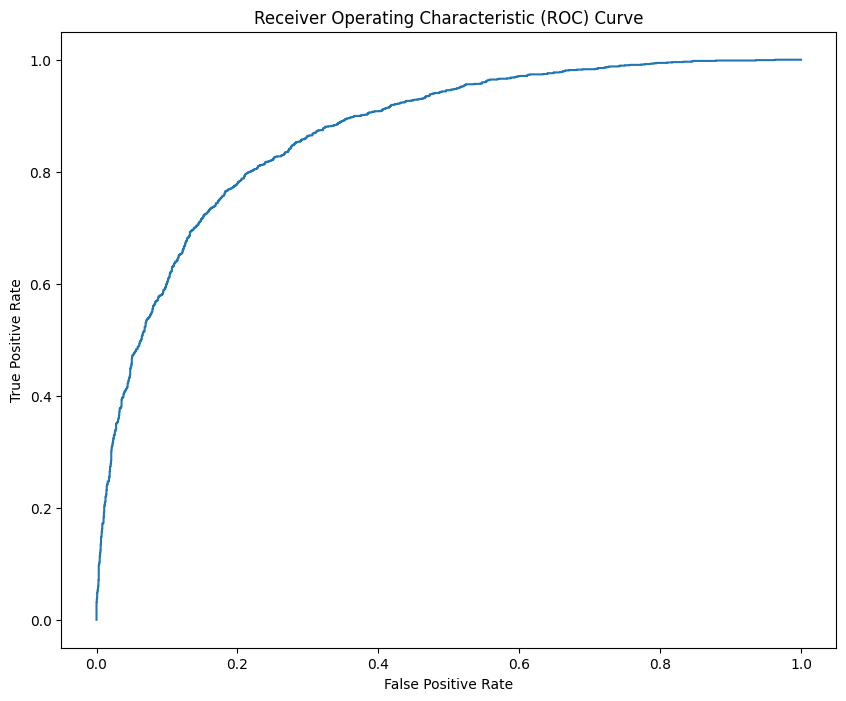

AUC Score: 0.8686702773759316


In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the predicted probabilities for each class
y_pred_prob = clf.decision_function(X_test)

# Compute the ROC curve and AUC score for each class
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred_prob.ravel())
auc_score = roc_auc_score(y_test.ravel(), y_pred_prob.ravel())

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Print the AUC score
print('AUC Score:', auc_score)


In [61]:
y_test

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1]])

In [62]:
from sklearn.metrics import log_loss

log_loss(y_test, y_pred)


50.820483689343035

In [63]:
# Assuming you have the following variables:
# predicted_values: a list or array of predicted values
# actual_values: a list or array of actual values

# Calculate the number of correct predictions
correct_predictions = sum(y_test == y_pred)

# Calculate the total number of predictions
total_predictions = len(y_pred)

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: [0.84289277 0.82044888 0.66832918 0.58852868 0.81795511 0.90274314
 0.75561097 0.88279302 0.82543641]
